In [1]:
# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

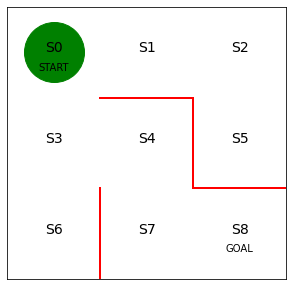

In [2]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8은 목표지점이므로 정책이 없다
                    ])

In [4]:
# 정책 파라미터 theta를 행동정책 pi로 변환(소프트맥스 함수 사용)하는 함수


def softmax_convert_into_pi_from_theta(theta):
    '''비율 계산에 소프트맥스 함수 사용'''

    beta = 1.0
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # theta를 exp(theta)로 변환

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 단순 비율을 계산하는 코드

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmax로 계산하는 코드

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [5]:
# 초기 정책 pi_0을 계산
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
# 행동 a를 취한 후의 상태 s를 구하는 함수

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next]

In [7]:
# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 출력한다


def goal_maze_ret_s_a(pi):
    s = 0  # 시작 지점
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트

    while (1):  # 목표 지점에 이를 때까지 반복
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 현재 상태(마지막이므로 인덱스가 -1)를 히스토리에 추가

        s_a_history.append([next_s, np.nan])
        # 다음 상태를 히스토리에 추가, 행동은 아직 알 수 없으므로 nan으로 둔다.

        if next_s == 8:  # 목표 지점에 이르면 종료
            break
        else:
            s = next_s

    return s_a_history

In [8]:
# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

[[0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 3], [3, 1], [4, 2], [7, 0], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다


In [9]:
# theta를 수정하는 함수

def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1  # 목표 지점에 이르기까지 걸린 단계 수

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    delta_theta = theta.copy()  # Δtheta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta가 nan이 아닌 경우

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 상태 i에서 행동 j를 취한 경우만 모음

                N_i = len(SA_i)  # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij)  # 상태 i에서 행동 j를 취한 횟수 
                
                # 초판에서 부호 오류가 있었음(수정일 : 1807030
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [10]:
# 정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.50104167 0.49895833 0.        ]
 [0.         0.49791668 0.         0.50208332]
 [0.         0.         0.5        0.5       ]
 [0.33287005 0.3342599  0.33287005 0.        ]
 [0.         0.         0.50208332 0.49791668]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.50104167 0.49895833 0.         0.        ]]


In [11]:
# 정책 경사 알고리즘으로 미로 빠져나오기

stop_epsilon = 10**-4  # 정책의 변화가 10^-4 보다 작아지면 학습을 종료


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continue가 False가 될 때까지 반복
    s_a_history = goal_maze_ret_s_a(pi)  # 정책 π를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history)  # 파라미터 Θ를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 정책 π를 수정

    print(np.sum(np.abs(new_pi - pi)))  # 정책의 변화를 출력
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.018527827558000476
목표 지점에 이르기까지 걸린 단계 수는 30단계입니다
0.006081443443350654
목표 지점에 이르기까지 걸린 단계 수는 70단계입니다
0.01371729946127348
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.023040406062187935
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.011545104471333167
목표 지점에 이르기까지 걸린 단계 수는 16단계입니다
0.008966770224959508
목표 지점에 이르기까지 걸린 단계 수는 110단계입니다
0.03226053065246026
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.012726782381179302
목표 지점에 이르기까지 걸린 단계 수는 58단계입니다
0.013146597998199172
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.016434701290559073
목표 지점에 이르기까지 걸린 단계 수는 40단계입니다
0.028854595787784987
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.009383089971332748
목표 지점에 이르기까지 걸린 단계 수는 38단계입니다
0.023987640302716273
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.019920994881929777
목표 지점에 이르기까지 걸린 단계 수는 24단계입니다
0.03147224153413197
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014679918301605088
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.015026431371044369
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.015992765292704436
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
0.04701126515465531
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.007545701713317365
목표 지점에 이르기까지 걸린 

0.014662816191205214
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.015011874995197572
목표 지점에 이르기까지 걸린 단계 수는 42단계입니다
0.01275490499321627
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
0.03440910764662014
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.03391203194277115
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.02898540174888667
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.03328942693269707
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.009510943503350994
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.019837054828300893
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.014714948515693382
목표 지점에 이르기까지 걸린 단계 수는 20단계입니다
0.019929562624504155
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.014497003438208228
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
0.014033953349254419
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
0.032624801277449794
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.021294628828756046
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.02011486793033998
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.03178068077309107
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.017602384934998744
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다
0.031252130414055
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.023862131376964024
목표 지점에 이르기까지 걸린 단계 수는 14단계입니다


0.011266179350925054
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01123910184707791
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.011210350432579133
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008486864766783356
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00838860239639122
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008291901042544597
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008196730750068562
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.009534793750071283
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.008096033555997348
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008004063123296434
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.007913530527080312
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.007824408473253872
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.012444135350169416
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.011426789714417282
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.009293390252633885
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.010779477447182537
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0078013804088797045
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.007714063471106966
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.01064906965127832
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.01564413712746253
목표 지점에 이르기까지 걸린 단계 수는 8단계입니다
0.0

0.005180248984116918
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002972760596925049
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0029499892361505436
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002927472868841728
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.006652752896893016
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002940737069348845
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.005656834539155477
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0029290651836276146
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002906729583765949
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002884643341241215
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0028628028234191708
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0028412044622794855
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00281984475307636
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0027987202530311284
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00277782758005396
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0050328257846536315
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0027709595970710904
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.010630222947198481
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
0.0027939032531279773
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.002773160611227836
목표 지점에 이르기까지 걸린 단계 수는 

0.008117866509098681
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0011569121830348889
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011512910294308593
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001145709913978124
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003698543556151651
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0011491691125801937
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011436074399270232
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011380852150550819
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.008083421581965247
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0011435963841807395
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011380757963734764
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001132594262406493
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011271514209117428
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011217469146315578
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011163803903600777
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011110514988941361
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.001105759894974849
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.003295108527875408
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003344818739935883
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.003395104455560835
목표 지점에 이르기까지 걸린 단계

0.000566815886383399
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005648494417084711
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005628930749361077
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005609467180558471
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0024321459906126233
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0005642513474396621
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005623003177152412
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000560359247947527
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005584280712167301
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.006749232069507609
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.002428993970977955
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.000570184021420922
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000568200951032622
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005662280670083453
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005642653004602136
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005623125830775469
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005603698471181792
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005584370254059536
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005565140513222253
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0005546008588032669
목표 지점에 이르기까지 걸린

0.0003609101230860161
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00035989857334739125
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00035889123426204733
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0019645557237959153
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0003627732220563458
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003617528904411617
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00036073682314294656
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003597249965734649
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003587173873080586
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00035771397208217426
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003567147277910472
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003557196314871655
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00035472866038064113
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00035374179183725665
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003527590033759985
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003517802726699312
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000350805577542964
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003498348959709678
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00034886820607734834
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0003479054861353463
목표 

0.00027490524678222897
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002742253309021142
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002735479270876279
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00027287302299484895
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00027220060635722507
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002715306649823078
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00027086318675297386
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00027019815962433386
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002695355716272538
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002688754108639488
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026821766550923914
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026756232381076883
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002669093740868475
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002662588047256248
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002656106041882822
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00026496476100231967
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000264321263767537
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002636801011507324
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002630412618872327
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0002624047347817883
목표

0.00019281245616587298
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001924007794448252
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019199043624893233
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019158142075883372
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001911737271869489
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019076734977726932
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019036228280517285
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001899585205781141
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0011727143854111163
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00019082115412407188
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019041733868862057
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00019001481794547748
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018961358630723013
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018921363821647157
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018881496814453225
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018841757059462685
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018802144009910302
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018762657121963212
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018723295854645126
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00018684059670

0.0001608131752888521
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016049591735655712
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016017961008429372
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0015048382895235697
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0001628368958393276
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016251267010418922
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016218942634266785
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016186716054933208
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001615458687420912
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016122554695696852
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0009945238690390532
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00016174216675709369
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016142246692685963
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016110372738669353
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016078594425394076
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016046911366703748
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00016015323178151727
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00015983829477607923
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00015952429884577742
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.000159211240205

0.00012530491942629174
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001250875427257596
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001248707390408138
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012465450633828735
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012443884259100667
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012422374578287265
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001240092139067478
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012379524496444402
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012358183696541646
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001233689879290966
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001231566958839296
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012294495886696483
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012273377492302666
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0013447426807501085
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.0001249439924986221
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0009412129684711647
목표 지점에 이르기까지 걸린 단계 수는 6단계입니다
0.00012558662511164345
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.00012536859164504963
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001251511335940078
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
0.0001249342489117906

In [12]:
# 학습이 끝난 정책을 확인
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.013 0.987 0.   ]
 [0.    0.256 0.    0.744]
 [0.    0.    0.437 0.563]
 [0.013 0.976 0.011 0.   ]
 [0.    0.    0.988 0.012]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.016 0.984 0.    0.   ]]


In [13]:
# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 배경 이미지 초기화
    line.set_data([], [])
    return (line,)


def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0]  # 현재 위치
    x = (state % 3) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


#　초기화 함수와 프레임 단위 이미지 생성한수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())